Set up 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats
from scipy import stats

Import the Data set

In [7]:
df = pd.read_csv('Medical Cost Personal Datasets.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
165,47,male,28.215,4,no,northeast,10407.08585
494,21,male,25.700,4,yes,southwest,17942.10600
181,18,female,38.280,0,no,southeast,1631.82120
829,39,male,21.850,1,no,northwest,6117.49450
1312,34,male,42.900,1,no,southwest,4536.25900


In [29]:
description = df.describe()
description

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [67]:
len(df)

1338

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002122F1EDF70>,
      dtype=object)

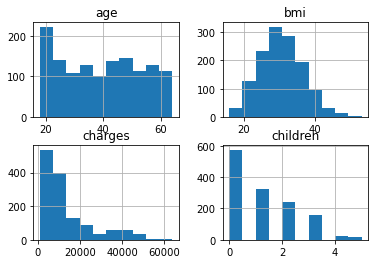

In [68]:
df.hist()

Explore how each of the variables impact on the medical cost

In [56]:
df_male = df[df.sex == 'male']
average_cost_male = df_male['charges'].mean()

df_female = df[df.sex == 'female']
average_cost_female = df_female['charges'].mean()

df_northeast = df[df.region == 'northeast']
average_cost_northeast = df_northeast['charges'].mean()

df_northwest = df[df.region == 'northwest']
average_cost_northwest = df_northwest['charges'].mean()

df_southeast = df[df.region == 'southeast']
average_cost_southeast = df_southeast['charges'].mean()

df_southwest = df[df.region == 'southwest']
average_cost_southwest = df_southwest['charges'].mean()

df_smoker = df[df.smoker == 'yes']
average_cost_smoker = df_smoker['charges'].mean()

df_nonsmoker = df[df.smoker == 'no']
average_cost_nonsmoker = df_nonsmoker['charges'].mean()

df_kid = df[df.children > 0]
average_cost_kid = df_kid['charges'].mean()

df_nokid = df[df.children == 0]
average_cost_nokid = df_nokid['charges'].mean()

print('The average cost for male is ' + str(average_cost_male) + '.')
print('The average cost for female is ' + str(average_cost_female) + '.')
print('The average cost for people in northeast is ' + str(average_cost_northeast) + '.')
print('The average cost for people in southwest is ' + str(average_cost_southwest) + '.')
print('The average cost for people in northwest is ' + str(average_cost_northwest) + '.')
print('The average cost for people in southeast is ' + str(average_cost_southeast) + '.')
print('The average cost for smokers is ' + str(average_cost_smoker) + '.')
print('The average cost for non-smokers  is ' + str(average_cost_nonsmoker) + '.')
print('The average cost for people who have kid is ' + str(average_cost_kid) + '.')
print('The average cost for people who do not have kid is ' + str(average_cost_nokid) + '.')

The average cost for male is 13956.751177721886.
The average cost for female is 12569.57884383534.
The average cost for people in northeast is 13406.3845163858.
The average cost for people in southwest is 12346.93737729231.
The average cost for people in northwest is 12417.575373969228.
The average cost for people in southeast is 14735.411437609895.
The average cost for smokers is 32050.23183153285.
The average cost for non-smokers  is 8434.268297856199.
The average cost for people who have kid is 13949.94109348167.
The average cost for people who do not have kid is 12365.975601635882.


Based on the data above, I can conclude that the average cost for male is 13956.751177721886 and female is 12569.57884383534, so generally male spend more money on their medical stuff than female, but the difference between the cost in gender is not that big.

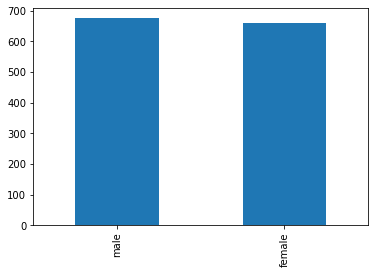

In [63]:
categorical_cols = df.select_dtypes(exclude="number").columns
categorical_cols
df_categorical = df[categorical_cols]
df_categorical.sample(5)
value_counts = df_categorical['sex'].value_counts()
value_counts
value_counts.plot.bar()

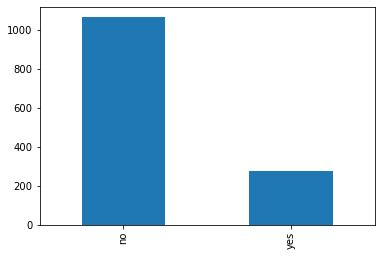

In [64]:
value_counts = df_categorical["smoker"].value_counts()
value_counts
value_counts.plot.bar()

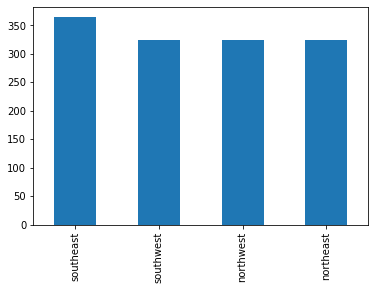

In [65]:
value_counts = df_categorical["region"].value_counts()
value_counts
value_counts.plot.bar()

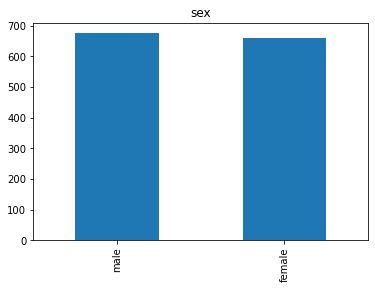

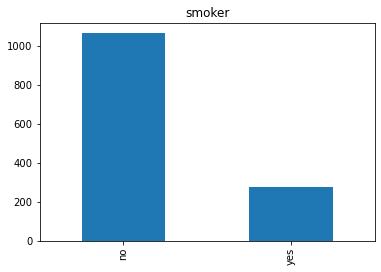

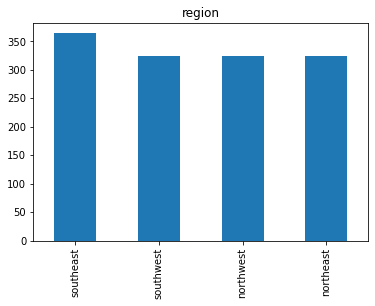

In [66]:
for column in categorical_cols:
    import matplotlib. pyplot as plt
    df_categorical[column].value_counts().plot.bar(title=column)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021231181D90>,
      dtype=object)

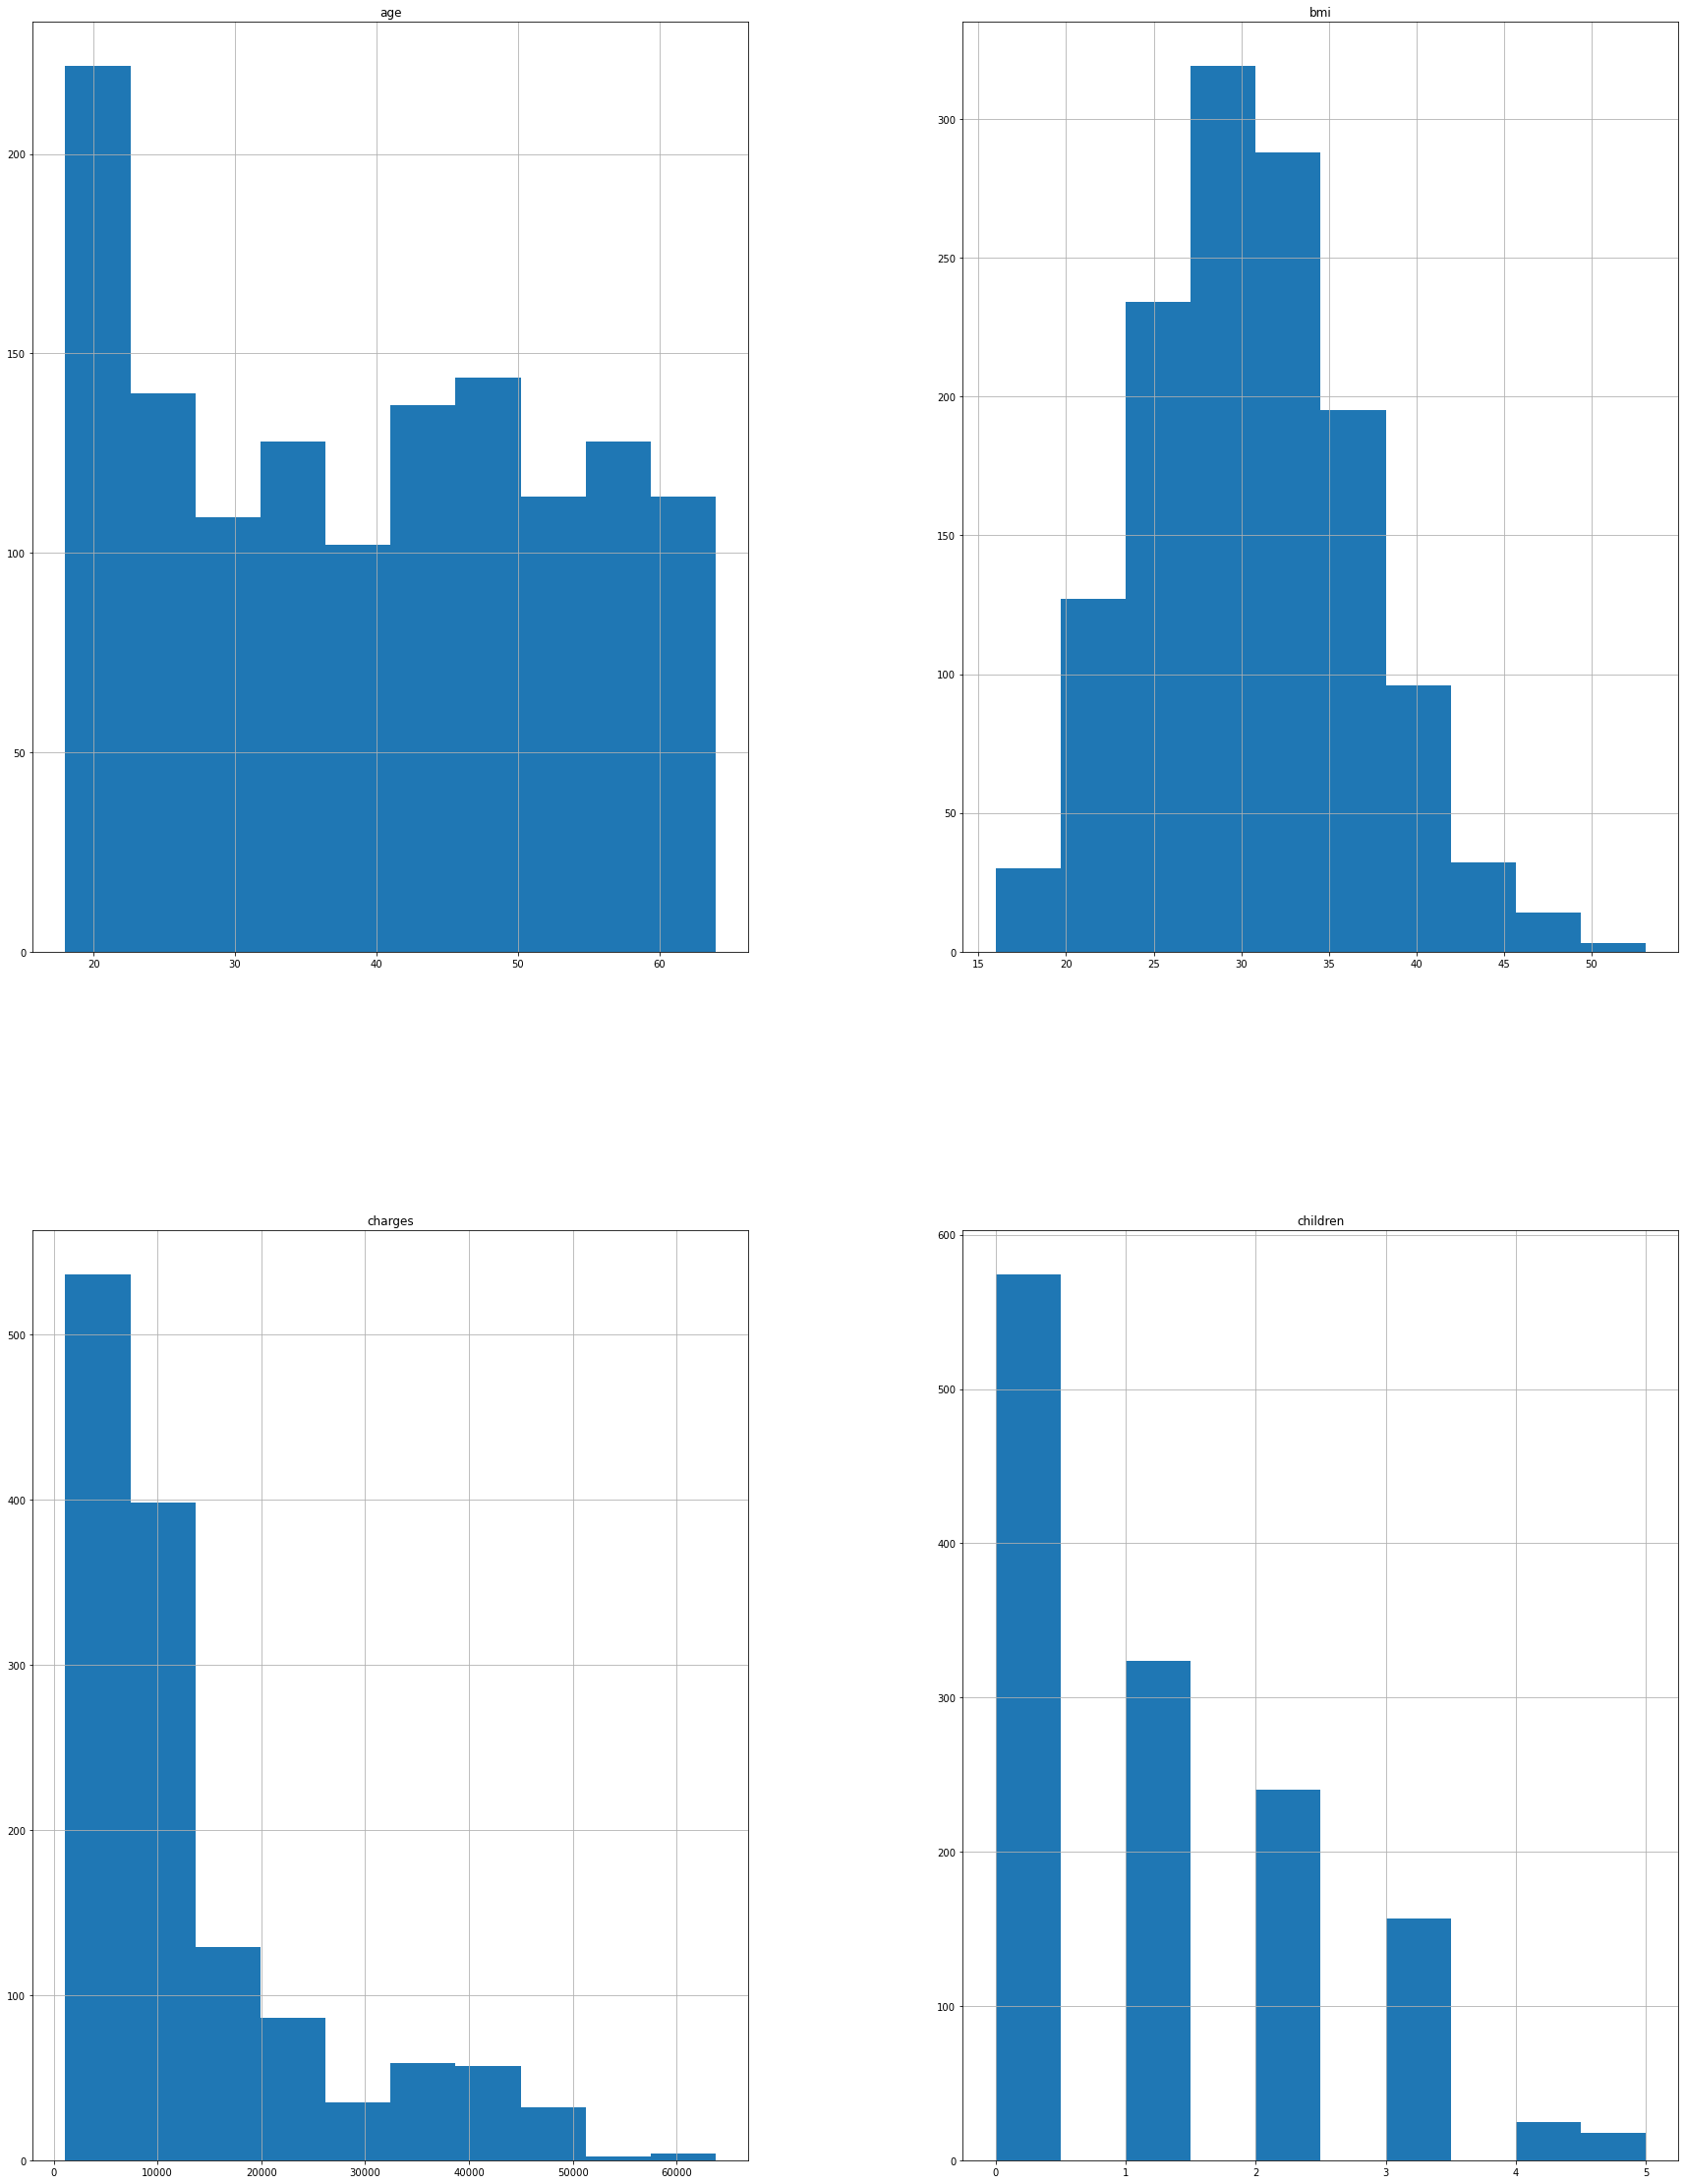

In [49]:
numcols = df.select_dtypes(include='number').columns
df_numeric = df[numcols]
df_numeric.sample(5)
df_numeric.hist(figsize=(30, 40))

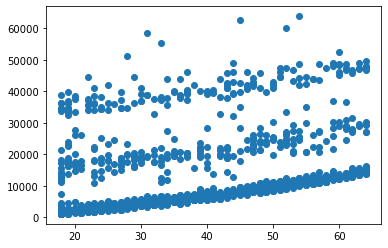

In [73]:
#Scatter Plot of age~charges 
plt.scatter(df['age'], df['charges'])


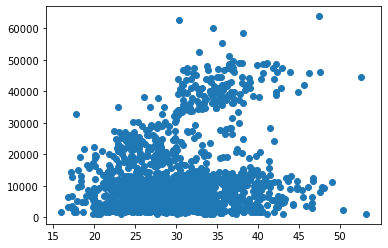

In [35]:
#Scatter Plot of bmi~charges
plt.scatter(df['bmi'], df['charges'])


In [36]:
#Code for Correlation Matrix
cor = df.corr()
cor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [39]:
#Creation of Model using age as the x-variable to predict charges.
model = LinearRegression()
model.fit(df[['age']], df.charges)
b0_age = model.intercept_
b1_age = model.coef_[0]

print("The intercept (ß0) = " + str(b0_age) + ".")
print("The slope (ß1) = " + str(b1_age) + ".")

The intercept (ß0) = 3165.885006063023.
The slope (ß1) = 257.7226186668956.


In [40]:
#Creation of Model using bmi as the x-variable to predict charges.
model = LinearRegression()
model.fit(df[['bmi']], df.charges)
b0_bmi = model.intercept_
b1_bmi = model.coef_[0]

print("The intercept (ß0) = " + str(b0_bmi) + ".")
print("The slope (ß1) = " + str(b1_bmi) + ".")

The intercept (ß0) = 1192.9372089611516.
The slope (ß1) = 393.8730307973952.


Charges = $\beta_0$ + $\beta_1$(age)


Charges =3165.885006063023 + 257.7226186668956(age)

Charges =1192.9372089611516 + 393.8730307973952(bmi)

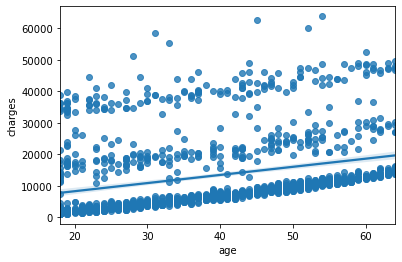

In [71]:
#Scatter Plot of age~charges with SLR
sns.regplot(df['age'], df['charges'], df)


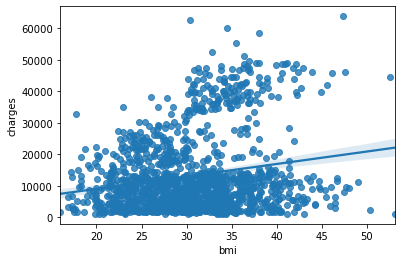

In [42]:
#Scatter Plot of age~charges with SLR
sns.regplot(df['bmi'], df['charges'], df)

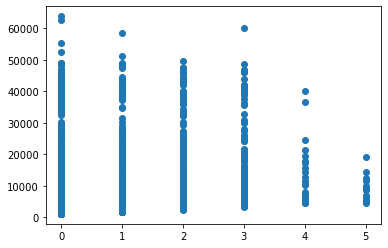

In [81]:
plt.scatter(df['children'], df['charges'])

<BarContainer object of 1338 artists>

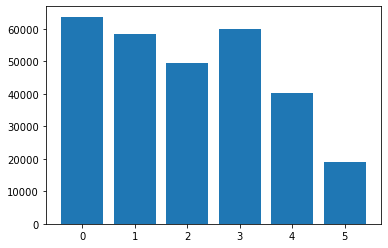

In [109]:
plt.bar(df['children'], df['charges'])

In [138]:
df0 = df[df['children'] == 0]['charges'].mean()
df1 = df[df['children'] == 1]['charges'].mean()
df2 = df[df['children'] == 2]['charges'].mean()
df3 = df[df['children'] == 3]['charges'].mean()
df4 = df[df['children'] == 4]['charges'].mean()
df5 = df[df['children'] == 5]['charges'].mean()
data = [[0, df0], [1, df1], [2, df2], [3, df3], [4, df4],[5, df5]]

dc = pd.DataFrame(data, columns = ['chidren', 'avg_cost'])
dc



,chidren,avg_cost
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


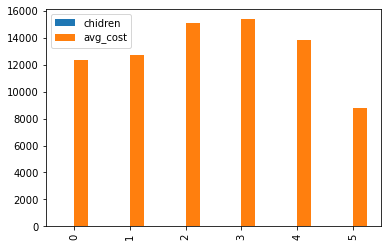

In [139]:
dc.plot.bar()